Previsão de Demanda de Gasolina com Regressão Linear (Python + Pandas + Scikit-Learn)

In [13]:
# 📦 Etapa 1: Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vendas_gasolina.csv to vendas_gasolina.csv


In [7]:
df = pd.read_csv("vendas_gasolina.csv", parse_dates=["data"])
df.head()

,data,vendas_litros,preco_gasolina,temperatura,chuva,feriado
0,2024-01-01,1674,5.61,26,0,0
1,2024-01-02,1579,5.64,34,1,0
2,2024-01-03,1697,5.64,25,1,0
3,2024-01-04,1828,5.63,32,0,0
4,2024-01-05,1564,5.65,25,0,0


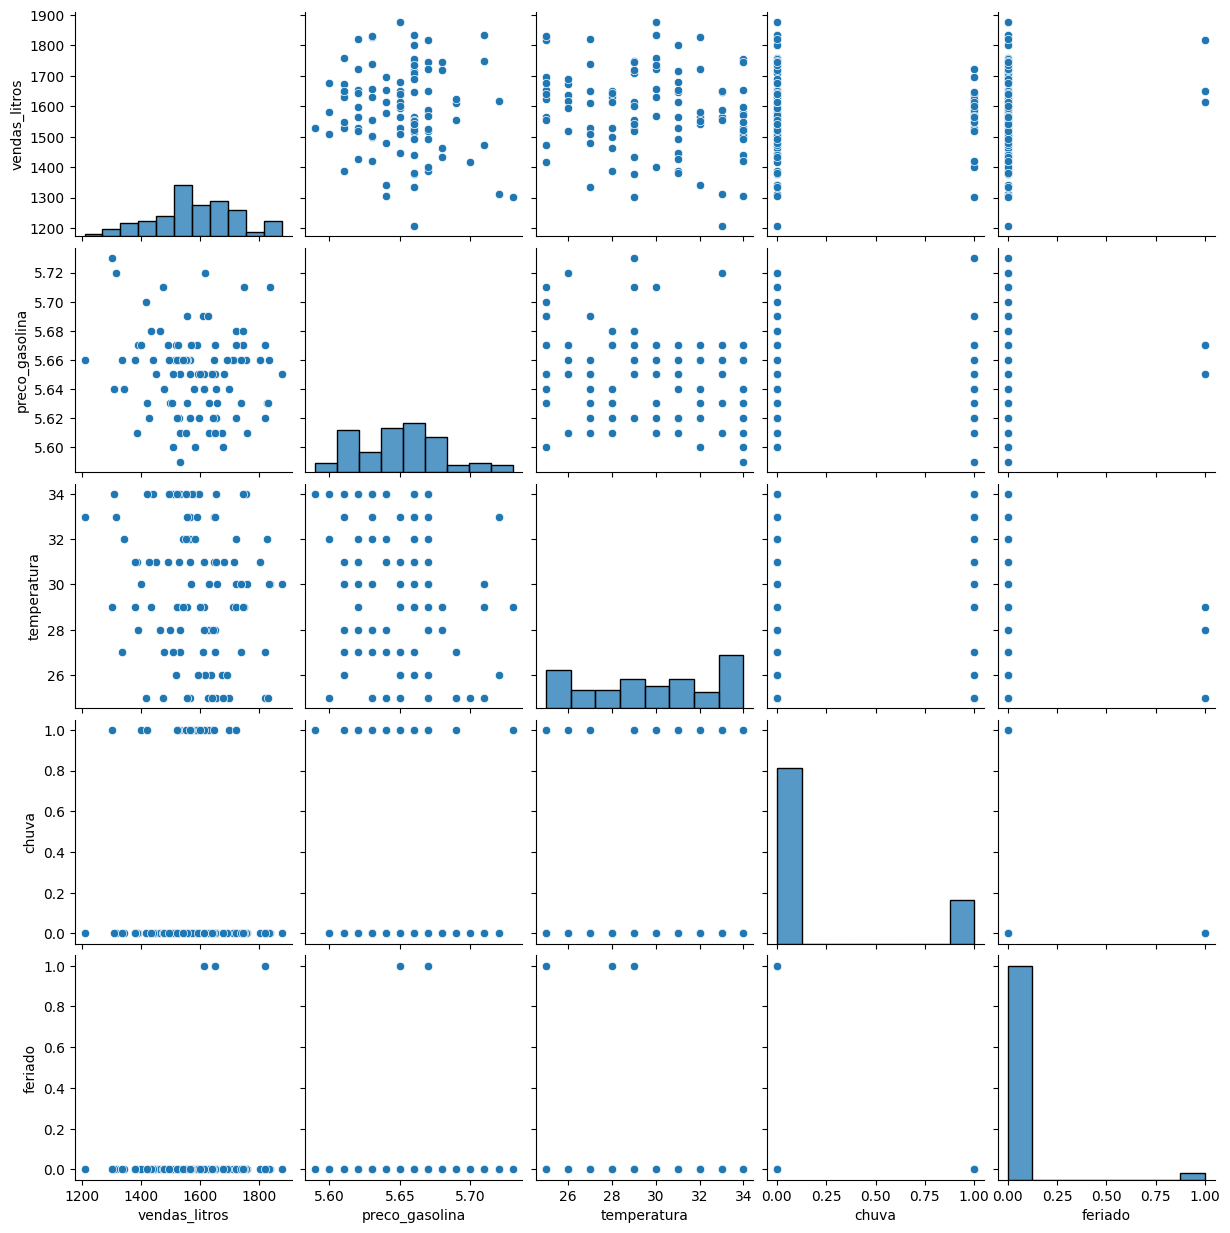

In [8]:
# 📊 Etapa 3: Visualização rápida
sns.pairplot(df[["vendas_litros", "preco_gasolina", "temperatura", "chuva", "feriado"]])
plt.show()

In [9]:
# 📈 Etapa 4: Preparando os dados
X = df[["preco_gasolina", "temperatura", "chuva", "feriado"]]  # features
y = df["vendas_litros"]  # target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 🤖 Etapa 5: Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

R² (coeficiente de determinação): 0.04
RMSE (erro quadrático médio): 115.86


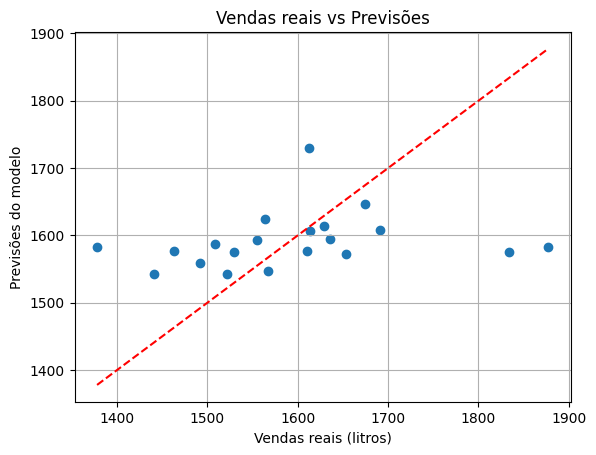

🔮 Previsão de vendas para novo cenário: 1617 litros


In [15]:
# 📊 Etapa 6: Avaliação
y_pred = modelo.predict(X_test)

print(f"R² (coeficiente de determinação): {r2_score(y_test, y_pred):.2f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (erro quadrático médio): {rmse:.2f}")

# 📉 Visualização da previsão vs real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Vendas reais vs Previsões")
plt.xlabel("Vendas reais (litros)")
plt.ylabel("Previsões do modelo")
plt.grid()
plt.show()

# 🔮 Previsão com novos dados
import pandas as pd

exemplo = pd.DataFrame({
    "preco_gasolina": [5.60],
    "temperatura": [28],
    "chuva": [1],
    "feriado": [0]
})
previsao = modelo.predict(exemplo)
print(f"🔮 Previsão de vendas para novo cenário: {previsao[0]:.0f} litros")
